## Lab: Cart Pole using OpenAI gym
## RL Basics and Simple Policy

### University of Virginia
### Reinforcement Learning
#### Last updated: February 26, 2024

---


#### Instructions:  

Carefully read the notes below and run the provided code. Answer each question clearly and show all results.

#### TOTAL POINTS: 10

---

### Agent and Environment

It is essential for the agent to have a way to get the next state and reward from the environment.

Sometimes it is possible for the agent to interact with environment in real life, but often this is expensive / dangerous / impossible.

We use models and simulators in this latter case.

For this reason, the Gym package is useful in RL

**Note**: Going forward, the fork [gymnasium](https://gymnasium.farama.org/) will maintain OpenAI gym.  
We will be using `gymnasium` but will still refer to the environment as `gym` when it doesn't cause confusion.

---

### Introduction to Gym

Gym is a toolkit for developing and comparing RL algorithms.

It comes with many pre-built environments which have functionality to emulate physical environments.

Users can build their own custom environments. See [here](https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e#:~:text=8%20min%20read-,Create%20custom%20gym%20environments%20from%20scratch%20%E2%80%94%20A%20stock%20market%20example,Atari%20games%20to%20experiment%20with.) for example.

---

### Cart Pole Problem

The **CartPole** problem has a small state space and action space, so it's popular for illustrating ideas.

Pole is attached to a cart on a frictionless track.

Pole starts upright

**Goal** is to keep pole from falling over

Control system by applying **force** -1 or +1 to cart.

**Reward** of +1 for each timestep the pole remains upright

**Episode** ends when pole is more than 12 degrees from vertical, or cart moves more than 2.4 units from center

CartPole-v1 defines *solving* as getting average reward of 195.0 over 100 consecutive trials.

<img src="https://github.com/tylergorecki/reinforcement_learning/blob/main/01_rl_fundamentals/cartpole.png?raw=1" alt="drawing" width="150"/>

---

### Setup and First Steps

This notebook can be easily run on [Google Colab](https://colab.research.google.com/)

In [13]:
! pip install gymnasium

We can use [renderlab](https://github.com/ryanrudes/renderlab/tree/main) to visualize *results*

In [14]:
! pip install renderlab

In [15]:
import gymnasium as gym
import renderlab as rl

Load the environment

In [16]:
env = gym.make("CartPole-v1", render_mode = "rgb_array")

state = env.reset(seed=314)
print(state)

(array([0.04225422, 0.02126478, 0.02520455, 0.00700802], dtype=float32), {})


Given the state, we take an action. The next state comes from the environment, which is encoded in `gym`.

The first element holds components:   
[0]: cart horizontal position (0.0 = center)  
[1]: velocity (positive means right)  
[2]: angle of the pole (0.0 = vertical)  
[3]: pole's angular velocity (positive means clockwise)

In [17]:
# state space number of components
env.observation_space.shape[0]

4

The action space consists of two options:

[0]: move cart left   
[1]: move cart right

In [18]:
env.action_space

Discrete(2)

Let's take an action, draw a sample and look at the results.

In [19]:
# move right
action = 1

# take a step and get next state, reward from environment
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

print('state', state)
print('reward', reward)
print('done', done)
print('info', info)

state [ 0.04267951  0.21601637  0.02534471 -0.27761722]
reward 1.0
done False
info {}


**Note about DONE**  
We need to understand if the episode is done after taking action  

The API now gives more detail on this variable, which may reach `done` state for two reasons:  
- **terminated**=True if environment terminates (eg. due to task completion, failure etc.)  
- **truncated**=True if episode truncates due to a time limit or a reason that is not defined as part of the task MDP.

**Run several steps by taking random actions**  

In [20]:
state = env.reset(seed=314)
for _ in range(5):
    print(env.step(env.action_space.sample())) # take a random action

(array([ 0.04267951, -0.1742094 ,  0.02534471,  0.30753553], dtype=float32), 1.0, False, False, {})
(array([ 0.03919533, -0.36968315,  0.03149542,  0.6081025 ], dtype=float32), 1.0, False, False, {})
(array([ 0.03180166, -0.56523097,  0.04365747,  0.9105369 ], dtype=float32), 1.0, False, False, {})
(array([ 0.02049704, -0.3707261 ,  0.06186821,  0.63188887], dtype=float32), 1.0, False, False, {})
(array([ 0.01308252, -0.5666542 ,  0.07450598,  0.94339633], dtype=float32), 1.0, False, False, {})


**Run an epoch by taking random actions. Visualize the results.**  

In [21]:
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/18 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1737681318.1272724.mp4, 720000 bytes wanted but 0 bytes read,at frame 17/18, at time 0.57/0.57 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


**Reward and Episode**  

For each time step that the cart keeps the pole balanced, it earns reward 1.

If the pole tilts too much or if the cart moves off screen, `reward=0` and `done=True` (the episode will end).

When the episode ends, a new episode may begin. The process learns cumulatively from each episode.

---

#### 1) Defining a function that runs a simple policy
**(POINTS: 1)**

When the pole leans left (negative angle), move left. When the pole leans right (positive angle), move right.  

The function should take the state and return an action. Test that it works properly.  

In [22]:
# create policy
def simple_action(pole_angle):
  if pole_angle < 0:
    return 0
  else:
    return 1

# test output
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = simple_action(observation[2]) # observation[2] returns the pole angle
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  82%|████████▏ | 32/39 [00:00<00:00, 311.32it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1737681318.360318.mp4, 720000 bytes wanted but 0 bytes read,at frame 38/39, at time 1.27/1.27 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


#### 2) Simulating episodes with the simple policy  

2a) **(POINTS: 2)** Run 1000 episodes each with 100 time steps. Use the `simple_policy` for taking actions.  
Each time step will call the `step()` method to get the next state and reward. Produce a boxplot of the rewards from each episode.

In [23]:
# create policy
def simple_action(pole_angle):
  if pole_angle < 0:
    return 0
  else:
    return 1

# create list to hold rewards
rewards = []

# 1000 iterations
for i in range(1000):
  # if i % 50 == 0: print(i)

  single_reward = 0

  # test output
  observation, info = env.reset()

  for x in range(100):
      action = simple_action(observation[2]) # observation[2] returns the pole angle
      observation, reward, terminated, truncated, info = env.step(action)
      single_reward = single_reward + reward

      if terminated or truncated:
        break

  rewards.append(single_reward)

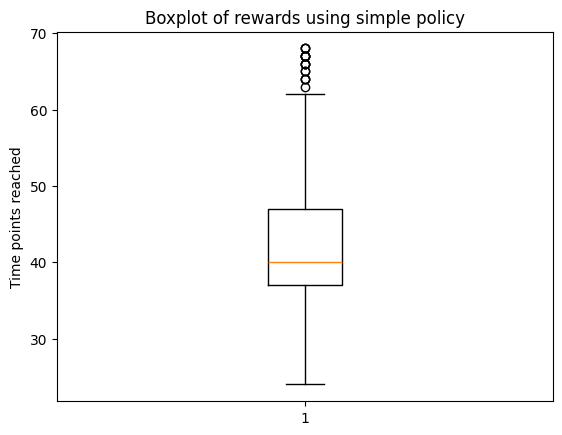

In [24]:
import matplotlib.pyplot as plt

plt.boxplot(rewards)
plt.title("Boxplot of rewards using simple policy")
plt.ylabel("Time points reached")
plt.show()

2b) **(POINTS: 1)** Is this policy able to solve the cart pole problem? Explain your answer.

No, none of the episodes were able to reach more than 70 time points. The pole seems to gradually gain more and more momentum until eventually passing over the angle of no return.

#### 3) From Question [2], what is the mean and maximum reward (roughly)?
**(POINTS: 1)**

In [25]:
print("Mean:", sum(rewards)/len(rewards))
print("Maximum:", max(rewards))

Mean: 41.978
Maximum: 68.0


#### 4) Reversed Simple Policy
**(POINTS: 2)**

What happens if you reverse the simple policy, moving left when the pole leans right, and moving right when the pole leans left? This is not a good idea, but it's instructive. To show the result, produce the boxplot from before, and calculate the mean reward.

In [26]:
# create reversed policy
def simple_action_reversed(pole_angle):
  if pole_angle > 0:
    return 0
  else:
    return 1

# create list to hold rewards
rewards = []

# 1000 iterations
for i in range(1000):
  # if i % 50 == 0: print(i)

  single_reward = 0

  # test output
  observation, info = env.reset()

  for x in range(100):
      action = simple_action_reversed(observation[2]) # observation[2] returns the pole angle
      observation, reward, terminated, truncated, info = env.step(action)
      single_reward = single_reward + reward

      if terminated or truncated:
        break

  rewards.append(single_reward)

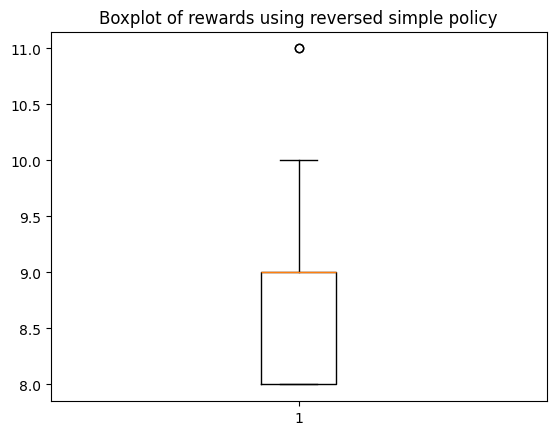

In [27]:
plt.boxplot(rewards)
plt.title("Boxplot of rewards using reversed simple policy")
plt.show()

In [28]:
print("Mean:", sum(rewards)/len(rewards))

Mean: 8.728


#### 5) Modified Policy
**(POINTS: 2)** Full points for attempt and clear explanation.

Time to get creative! See if you can try a different policy that improves the mean reward. Clearly explain your strategy.

In [29]:
# observation[0] returns the cart horizontal position
# observation[1] returns the cart velocity (R +)
# observation[2] returns the pole angle
# observation[3] returns the pole angular velocity (CW +)

import numpy as np

# create policy
def custom_action(state):
  cart_pos, cart_velo, pole_angle, pole_velo = state[0], state[1], state[2], state[3]
  if pole_angle < -0.035:
    return 0

  if pole_angle > 0.035:
    return 1

  if pole_velo < 0:
    return 0

  if pole_velo > 0:
    return 1

  return cart_pos < 0

# test output
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()
rewards = 0

while True:
    action = custom_action(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    rewards = rewards + reward

    if terminated or truncated:
      break

print(rewards)
env.play()

500.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [30]:
# create list to hold rewards
rewards = []

# 100 iterations
for i in range(100):
  # if i % 10 == 0: print(i)

  single_reward = 0

  # test output
  observation, info = env.reset()

  while True:
      action = custom_action(observation)
      observation, reward, terminated, truncated, info = env.step(action)
      single_reward = single_reward + reward

      if terminated or truncated:
        break

  rewards.append(single_reward)

In [32]:
print("Mean:", sum(rewards) / len(rewards))

Mean: 497.19


My first two if-statements check to see if the pole is overly tilted too far left or right. If it's leaning too far right, then I move the cart right and the same thing the other way. I tinkered with the value for a while, as it took me a few attempts to realize how small the magnitude of the angle for these checks should be. After that, I felt that if the pole was close to straight up but not exactly, I wanted to focus on just moving the cart in the opposite direction of the pole movement to make sure of balance in terms of momentum. Because the pole was nearly straight up, I had room to counteract the velocity instead of worrying about the angle specifically. This seemed to do it's job and I added the final statement, if the pole wasn't moving and was straight up, to move the cart back towards the center. Overall, it seems like my runs were timing out so this approach was successful. This was about my third combination of if-statements, so it was exciting to see the pole stay up for as long as it did.

---  

### Wrapup

This demo illustrated some basic ideas of reinforcement learning and got you started with OpenAI Gym.

We will revisit this example later, bringing in more tools for a better solution.

---
